# Predict House Prices of Brooklyn's Dumbo Neighbourhood using Linear Regression

This notebook demonstrates a simple linear regression model to predict house prices based soley on their size.

**Variables:**
- **House Size** : The size of the house in square feet
- **House Price** : The price of the house in US dollars (million $)


## Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading and exploring the dataset


In [ ]:
# Upload file from local machine
from google.colab import files
uploaded = files.upload()

Saving home_dataset.csv to home_dataset.csv


In [ ]:
# Load data from the CSV file
import io
data = pd.read_csv(io.BytesIO(uploaded['home_dataset.csv']))

In [ ]:
# Inspect the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   HouseSize   59 non-null     int64
 1   HousePrice  59 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [ ]:
# Check for null or missing values in the data
data.isnull().sum()

,0
HouseSize,0
HousePrice,0


In [ ]:
data.describe()

,HouseSize,HousePrice
count,59.000000,5.900000e+01
mean,1254.762712,1.875949e+06
std,519.147422,7.883950e+05
min,389.000000,1.000000e+00
25%,793.000000,1.285000e+06
50%,1230.000000,1.870000e+06
75%,1619.500000,2.435000e+06
max,3058.000000,3.700000e+06


In [ ]:
# Check for duplicates in the data
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [ ]:
# Remove duplicated rows
data.drop_duplicates(inplace=True)

In [ ]:
# Print the dataset
data.head(100)

,HouseSize,HousePrice
0,793,1300000
1,2477,3700000
2,1263,1480000
3,1291,2380000
4,603,955000
5,1655,2130000
6,1071,1300000
7,1877,2700000
8,1610,2650000
9,3058,2850000


In [ ]:
# Remove row where the 'HousePrice' is $1
data = data[data['HousePrice'] != 1]

In [ ]:
# Extract features and target variable
house_size = data['HouseSize'].values
house_price = data['HousePrice'].values

## Data Visualization

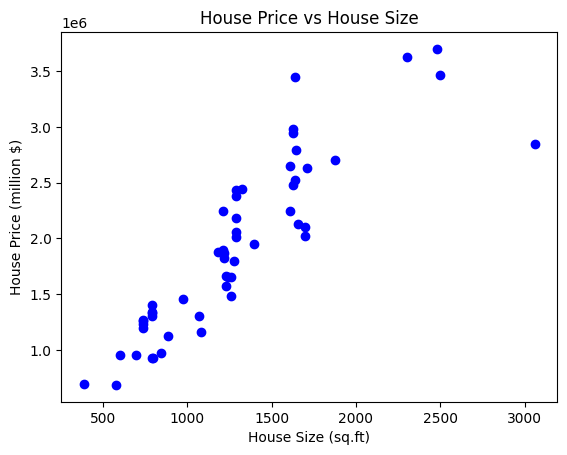

In [ ]:
# Visualize the data
plt.scatter(house_size, house_price, marker = 'o', color = 'blue')
plt.xlabel('House Size (sq.ft)')
plt.ylabel('House Price (million $)')
plt.title('House Price vs House Size')
plt.show()

### Figure 1: House Price vs. House Size

**Axes Interpretation:**
- **X-Axis (independent variable):** house size in square feet.
- **Y-Axis (dependent variable):** house price in US dollars (million $). Also known as the target variable as it is dependent on the house size.

**Scatter-plot interpretation:**

- There is a clear ***positive relationship*** between the house size and house price. As the size of the house increases, its price generally increases.

- The data points appear to also cluster around an upward-sloping line, indicating a ***moderate to strong linear pattern***.

- This visual evidence suggests that ***linear regression*** is the most appropriate modeling technique for this dataset

## Correlation Analysis
It is a statistical technique used to determine the strength and direction of a relationship between two variables.

In [ ]:
# Find the correlation between the data
correlation = data['HouseSize'].corr(data['HousePrice'])
print(f"The correlation between 'HouseSize' and 'HousePrice' is: {correlation}")

The correlation between 'HouseSize' and 'HousePrice' is: 0.880257634810008


In [ ]:
# Interpretation
if abs(correlation) >= 0.7:
  strength = "strong"
elif 0.3 <= abs(correlation) < 0.7:
  strength = "moderate"
else:
  strength = "weak"

direction = "positive" if correlation > 0 else "negative"
print(f"There is a {strength} {direction} relationship between  the house size and price.")

There is a strong positive relationship between  the house size and price.


## Datapreprocessing

In [ ]:
''' Splitting the data into training and testing sets.
80% of the data is used to train the data, and the 20% is used to test the algorithm '''
x_train, x_test, y_train, y_test = train_test_split(house_size, house_price, test_size=0.2, random_state=42)

In [ ]:
# Reshape the data for NumPy
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

## Building and training the model

In [ ]:
# Creating and training the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Model Evaluation: Predictions & Visualizations

In [ ]:
# Predict prices for the test set
prediction = model.predict(x_test)

In [51]:
# Basic statistics
avg_size = data['HouseSize'].mean()
avg_price = data['HousePrice'].mean()
price_per_sqft = model.coef_[0]

In [ ]:
# Intercept, Slope, and Regression Equation
print("Intercept: ", model.intercept_)
print("Slope: ", model.coef_)
print(f"The regression equation is: Price = {model.intercept_:.2f} + {model.coef_[0]:.2f} x House Size (sq.ft)")

Intercept:  239053.86478449893
Slope:  [1285.04542957]
The regression equation is: Price = 239053.86 + 1285.05 x House Size (sq.ft)


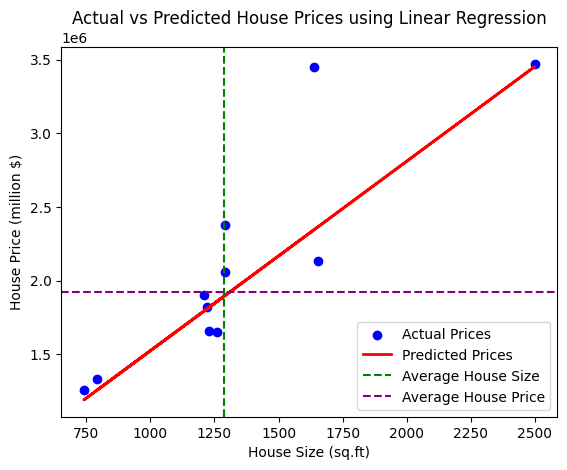

In [45]:
# Visualize the predictions
plt.scatter(x_test, y_test, marker = 'o', color = 'blue', label = 'Actual Prices')
plt.plot(x_test, prediction, color = 'red', linewidth = 2, label = 'Predicted Prices')
plt.axvline(x = avg_size, color = 'green', linestyle = '--', label = 'Average House Size')
plt.axhline(y = avg_price, color = 'purple', linestyle = '--', label = 'Average House Price')
plt.xlabel('House Size (sq.ft)')
plt.ylabel('House Price (million $)')
plt.title('Actual vs Predicted House Prices using Linear Regression')
plt.legend()
plt.show()

### Figure 2: Actual vs. Predicted House Prices using Linear Regression

**The Red Line (The Regression Line):**
- Also known as the 'line of best fit'. It minimizes the overall error between the data and the line.
- The slope represents how much will the price increase for each additional square foot.
  - The upward slope confirms the positive relationship observed in Figure 1.
  - The price per square foot is $1285

**The Green Dashed Line:**
- The average house size in this dataset is 1289 sq.ft

**The Purple Dashed Line:**
- The average house price in this dataset is $1,921,500


In [55]:
# Calulate other metrics to evaluate the model (MAE, RSME, R2)
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 239373.05977549395
Root Mean Squared Error (RMSE): 384965.65676840453
R-squared (R2): 0.7085465154060122


In [ ]:
# Calculate residuals
residuals = y_test - prediction

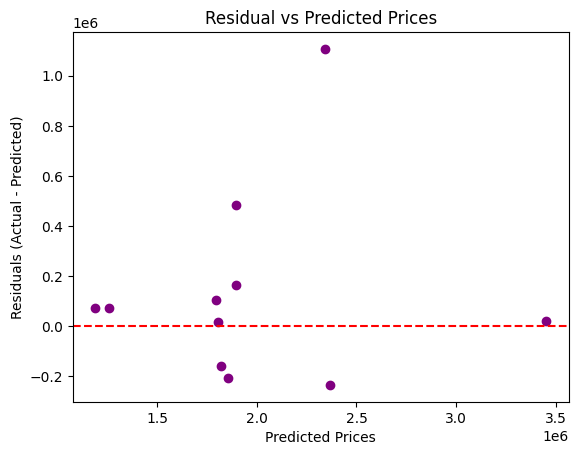

In [ ]:
# Plot the residuals
plt.scatter(prediction, residuals, color = 'purple')
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual vs Predicted Prices')
plt.show()

### Figure 3: Residual vs. Predicted Prices

**Axes Interpretation:**
- **X-Axis (predicted prices):** the house prices predicted by the model
- **Y-Axis (residuals):** represent the errors of the model. A residual is the difference between actual house prices and predicted house prices.

**Chart interpretation:**
- The size of the residuals varies. Most points are close to the zero-line, but there are a few larger residuals (a plot exceeding $1 million for instance).
- While the linear regression model is appropriate for the data, its predictions are not accurate for all cases.
- The **high margin of error** suggests that house size is not enough to accurately predict the price of a house. There are other important factors that could be at play that the current model may be ignoring such as the **location, features, and conditions of the home**.

In [ ]:
# Example Predictions
example_sizes = np.array([[1000], [1500], [2000], [2500], [3000]])
# new_house_size = new_house_size.reshape(-1, 1)
predicted_price = model.predict(example_sizes)
print("Example Predictions: ")
for size, price in zip(example_sizes, predicted_price):
  print(f"According to the model, the price of a house that is {size[0]} sq.ft is approximately ${price:.2f}")

Example Predictions: 
According to the model, the price of a house that is 1000 sq.ft is approximately $1524099.29
According to the model, the price of a house that is 1500 sq.ft is approximately $2166622.01
According to the model, the price of a house that is 2000 sq.ft is approximately $2809144.72
According to the model, the price of a house that is 2500 sq.ft is approximately $3451667.44
According to the model, the price of a house that is 3000 sq.ft is approximately $4094190.15


## Conclusion, Limitations, and Recommendations
**Main Insights:**
- The size of a house explains approximately **70.85%** of the variation in house prices.
  - However, the margin of error is large — **(MAE): 239,373 & (RMSE): 384,965**. This means that while the model explains about 71% of the variation in the house prices, the errors are large enough to indicate that size *alone* isn't enough for precise predictions.
- The price per square foot is **$1289 sq.ft**

**Limitations:**
- The dataset is very simple, containing only **58 rows** and a **single** feature.
- There are other factors that affect house prices such as the **location, features, amenities, and condition of the home**.

**Recommendations:**
- Collect additional data to improve model robustness  
- Add more relevant features
- Explore other models to validate the data (Huber Regressor, Ridge Regression)